# Titanic- Machine Learning From Disaster

Kaggle project by Siddhant Satapathy (https://www.kaggle.com/c/titanic/overview). In this project, I attempt to analyze the data on survivors of the Titanic and use insights gained from this in order to predict whether or not another set of passengers would have survived. I have primarily used Numpy and Pandas for data analysis and pyplot and seaborn for data visualization. I have also implemented a logistic regression classifier based on Stanford University's Machine Learning Course (available on Coursera) in this notebook, and this gives an accuracy of ~76% on the test set (in the top 25% of all participants). In the notebook Titanic_ML_2, I have implemented a Random Forest Classifier that improves upon the classifier in this notebook, and predicts survival rates with an accuracy of ~80% (in the top 8% of all participants)

In [1441]:
%matplotlib inline

# Importing libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy as sp
import pandas as pd

print("Library import complete")


Library import complete


In [1442]:
titanic_df=pd.read_csv('train.csv')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [1443]:
print("Data shape: ",titanic_df.shape)
print("Data columns: ", list(titanic_df.columns))


Data shape:  (891, 12)
Data columns:  ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


In [1444]:
titanic_df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [1445]:
#Find out number of NaN/null inputs for each column in training data frame
print(pd.isnull(titanic_df).sum())


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [1446]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Variable Notes**


***PassengerId:*** Unique ID of the passenger

***Survived:*** Survived (1) or died (0)

***Pclass:*** Passenger's class (1st, 2nd, or 3rd)

***Name***: Passenger's name

***Sex:*** Passenger's sex

***Age:*** Passenger's age

***SibSp:*** Number of siblings/spouses aboard the Titanic

***Parch:*** Number of parents/children aboard the Titanic

***Ticket:*** Ticket number

***Fare:*** Fare paid for ticket

***Cabin:*** Cabin number

***Embarked:*** Where the passenger got on the ship (C - Cherbourg, S - Southampton, Q = Queenstown)

In [1447]:
#number of male vs female passengers and male survival ratio vs female survival ratio

female_passengers = titanic_df.loc[titanic_df.Sex == 'female']
print("Number of female passengers= ",len(female_passengers))
print("Female survival ratio= ",female_passengers["Survived"].sum()/len(female_passengers))
print()
male_passengers = titanic_df.loc[titanic_df.Sex == 'male']
print("Number of male passengers= ",len(male_passengers))
print("Male survival ratio= ",male_passengers["Survived"].sum()/len(male_passengers))

Number of female passengers=  314
Female survival ratio=  0.7420382165605095

Number of male passengers=  577
Male survival ratio=  0.18890814558058924


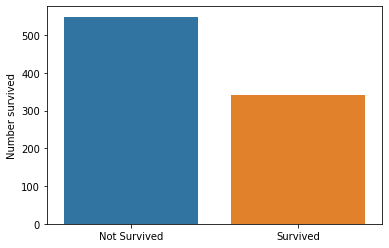

In [1448]:
# Plotting number who survived vs number who did not

figure, plot = plt.subplots()
sns.barplot(x= titanic_df["Survived"].value_counts().keys(), y=titanic_df["Survived"].value_counts(), ax=plot);
plot.set_xticklabels(['Not Survived', 'Survived']);
plot.set_ylabel("Number survived");

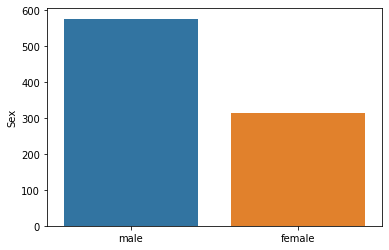

In [1449]:
# Plotting number of males and females on board

sns.barplot(x= titanic_df["Sex"].value_counts().index, y=titanic_df["Sex"].value_counts());

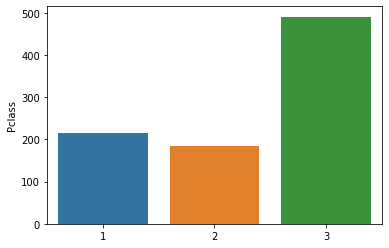

In [1450]:
# Plotting number of passengers in each class

sns.barplot(x= titanic_df["Pclass"].value_counts().index, y= titanic_df["Pclass"].value_counts());

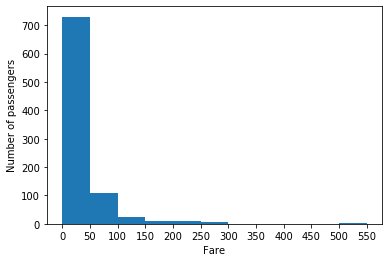

In [1451]:
# Fare distribution
import math

interval=50
bins= [interval*x for x in range (0, math.ceil(titanic_df['Fare'].max()/interval + 1))]

plt.hist(titanic_df["Fare"], bins);
plt.xlabel('Fare')
plt.ylabel('Number of passengers')
plt.xticks(bins);

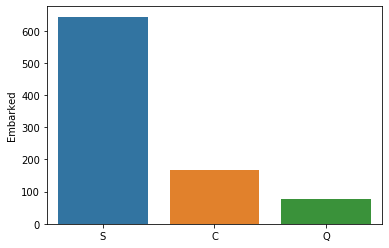

In [1452]:
# Where the passengers embarked from

sns.barplot(x= titanic_df["Embarked"].value_counts().index, y= titanic_df["Embarked"].value_counts())
# sns.scatterplot(x= 'SibSp', y= 'Parch', data=titanic_df)

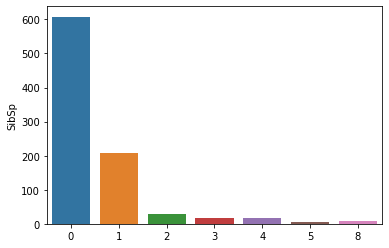

In [1453]:
# Number of siblings and spouses

sns.barplot(x= titanic_df["SibSp"].value_counts().index, y= titanic_df["SibSp"].value_counts());

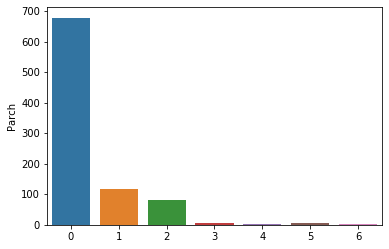

In [1454]:
# Number of Parents and children

sns.barplot(x= titanic_df["Parch"].value_counts().index, y= titanic_df["Parch"].value_counts());

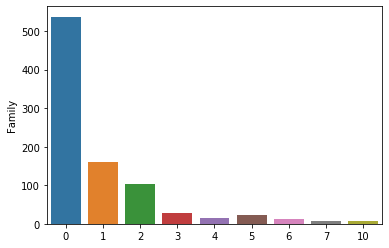

In [1455]:
# since the distributions of siblings & spouses and parents & children are very similar, we can merge them together to form a family data field

family= pd.Series(titanic_df["Parch"]+titanic_df["SibSp"])
titanic_df["Family"]=family

#plots family as barplot
sns.barplot(x= titanic_df["Family"].value_counts().index, y= titanic_df["Family"].value_counts());

In [1456]:
# Correlation table
titanic_df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Family
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658,-0.040143
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,0.016639
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.065997
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,-0.301914
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,0.890712
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,0.783111
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,0.217138
Family,-0.040143,0.016639,0.065997,-0.301914,0.890712,0.783111,0.217138,1.000000


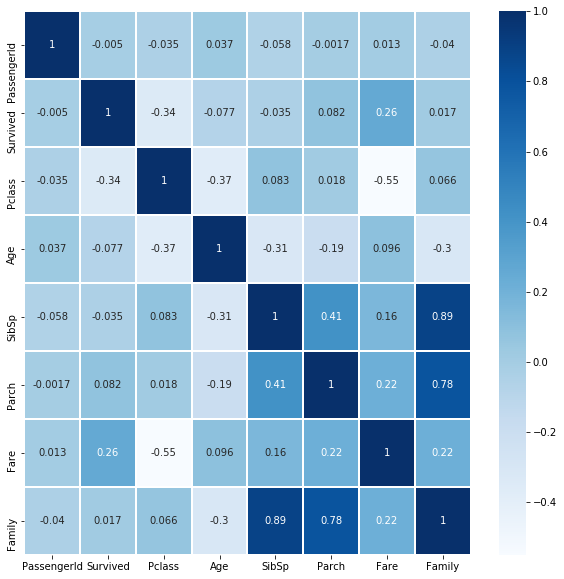

In [1457]:
# Heat map

plt.subplots(figsize=(10,10))
sns.heatmap(titanic_df.corr(), annot=True, cmap="Blues", linewidths=1);

We don't expect PassengerId to have strong correlations with any of the other data fields, and this is indeed the case.

We expect Survival to be linked with passenger class (and consequently fare), and this is the case. Survival is negatively correlated to passenger class, which indicates that passengers in higher numbered classes (E.g. 3) are less likely to have survived. Similarly, passengers who paid a higher fare had a greater chance of survival, which closely ties into their class (lower numbered classes would require a higher fare). However, the link is somewhat weaker than what we could have expected. We must also ask what the cause of this relationship is.

As expected, there is a strong negative correlation between the ticket fare and the class (explained above).

Siblings and spouses is positively correlated to Parents and children, which makes sense since any person having a child on board would likely be married (1912 was not a very popular year for single parents).

**Survivor Analysis**

Finding out what may have increased your odds of survival

In [1458]:
survivors = titanic_df.loc[titanic_df.Survived == True]


def seperate_labels_and_percentages(data, field):
    labels = data[field].value_counts().index.sort_values()
    percentages = []
    for i in labels:
        percentages.append(len(data.loc[data[field] == i]))
    return [labels, percentages]

def plot_bar_survivors(data, field):
    labels, percentages = seperate_labels_and_percentages(data, field)
    survivors_bar = sns.barplot(labels, percentages)
    survivors_bar.set_xlabel(field)

def plot_hist_survivors(data, field):
    labels, percentages = seperate_labels_and_percentages(data, field)
    survivors_hist = sns.distplot(labels, kde=False)
    survivors_hist.set_xlabel(field)

def plot_pie_survivors(data, field):
    fig, ax = plt.subplots()
    labels, percentages = seperate_labels_and_percentages(data, field)
    ax.pie(percentages, labels = labels, autopct='%1.0f%%');
    ax.set_title('Distribution of survivors according to '+ field);


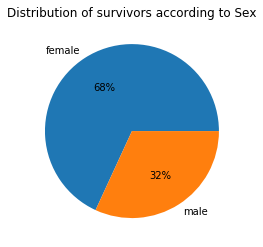

In [1459]:
# Distribution of survivors according to pre-specified criteria

plot_pie_survivors(survivors, 'Sex')

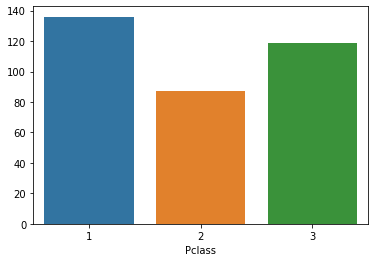

In [1460]:
# Distribution of survivors according to passenger class

plot_bar_survivors(survivors, 'Pclass')

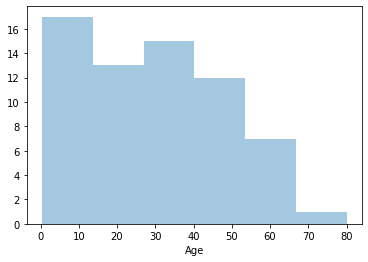

In [1461]:
# Distribution of survivors according to age

plot_hist_survivors(survivors, 'Age')

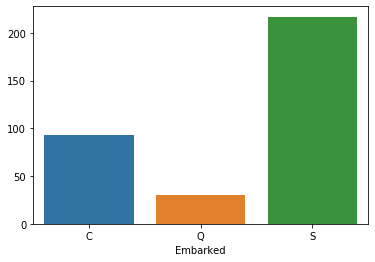

In [1462]:
# Distribution of survivors according to place departed

plot_bar_survivors(survivors, 'Embarked')

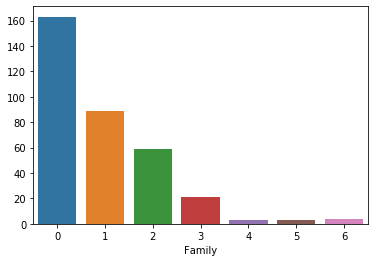

In [1463]:
# Distribution of survivors according to number of family members

plot_bar_survivors(survivors, "Family")

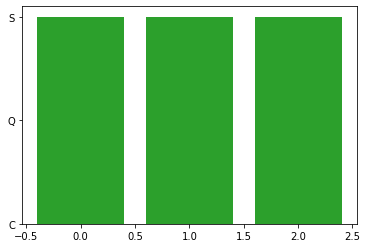

In [1464]:
grouped_by_embark = titanic_df.groupby('Embarked')["Survived"]
num_groups = len(grouped_by_embark.groups)

fig, axis = plt.subplots()
index = np.arange(num_groups)
for location, status in grouped_by_embark:
    plt.bar(index, location)

In [1465]:
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,3
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0


In [1466]:


pd.isnull(titanic_df).sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Family           0
dtype: int64

In [1467]:
pd.options.mode.chained_assignment = None  # default='warn'

# Dropping instances where embarked is null
titanic_df = titanic_df.loc[titanic_df['Embarked'].notna()]
titanic_df.shape

(889, 13)

In [1468]:

# Get dummy variables for Embarked
embarked_dummies = pd.get_dummies(titanic_df['Embarked'],prefix= 'Embarked')

# Since most cabins are NaN, we can drop the cabin column from the dataframe. We also can drop the Ticket column, since there 
# seems to be no discernable pattern. We can also drop PassengerId, Embarked and Name since they do not tell us anything about their survival status
# We can also drop SibSp and Parch since this is replace by family

titanic_df.drop(columns = ['Cabin', 'Ticket', 'Name', 'Embarked', 'PassengerId','Family'], inplace= True, errors='ignore')
titanic_df = pd.concat([titanic_df, embarked_dummies], axis=1)

In [1469]:
# Sex can also be replaced by True for females and False for males
titanic_df['Sex'] = titanic_df['Sex'] == 'female'

In [1470]:
# Dropping all rows where age is NaN
y = np.array(titanic_df['Survived'])
X = np.array(titanic_df.drop(columns='Survived'))
from sklearn.impute import SimpleImputer
my_imputer = SimpleImputer()
X = my_imputer.fit_transform(X)

In [1471]:
# test1 = titanic_df.loc[titanic_df['Age'].isna()]     #should be null
# print(test1)

In [1472]:
# Setting X and y arrays with the respective features


# X = np.array(titanic_df)
y = y.reshape(len(y),1)
print(y.shape)
print(X.shape)
pd.DataFrame(X)

(889, 1)
(889, 9)


,0,1,2,3,4,5,6,7,8
0,3.0,0.0,22.000000,1.0,0.0,7.2500,0.0,0.0,1.0
1,1.0,1.0,38.000000,1.0,0.0,71.2833,1.0,0.0,0.0
2,3.0,1.0,26.000000,0.0,0.0,7.9250,0.0,0.0,1.0
3,1.0,1.0,35.000000,1.0,0.0,53.1000,0.0,0.0,1.0
4,3.0,0.0,35.000000,0.0,0.0,8.0500,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
884,2.0,0.0,27.000000,0.0,0.0,13.0000,0.0,0.0,1.0
885,1.0,1.0,19.000000,0.0,0.0,30.0000,0.0,0.0,1.0
886,3.0,1.0,29.642093,1.0,2.0,23.4500,0.0,0.0,1.0
887,1.0,0.0,26.000000,0.0,0.0,30.0000,1.0,0.0,0.0


In [1473]:
# Adding intercept terms to X
ones = np.ones(X.shape[0]).reshape(X.shape[0],1)
X = np.concatenate([ones,X], axis= 1)

In [1474]:
# Ignoring feature mapping since we have 8+1=9 variables for our decision boundary

In [1475]:
# Function to compute regularized cost and gradient

def getSigmoid(x):
    return 1/(1+np.exp(-x))

def costFunctionReg(theta, X, y, Lambda):
    m = len(y)
    y = y.reshape([m,1])
    theta = theta.reshape([X.shape[1],1])

    # computing regularized parameter for cost function- N.B. @ is shorthand for the np.dot() operation 
    # since theta[0] is not regularized, the squared product of theta begins from index 1
    reg = Lambda/(2*m) * theta[1:].T @ theta[1:]

    # Predictions with current theta
    predictions = getSigmoid(X @ theta)

    # Computing cost
    cost = -(y.T @ np.log(predictions)+(1-y.T) @ np.log(1-predictions))/m + reg
    cost = cost.flatten()

    return cost[0]

def computeGradient(theta, X, y, Lambda):
    m = len(y)
    '''Computes Gradient with current theta'''
    theta = theta.reshape([X.shape[1],1])
    
    # Predictions with current theta
    predictions = getSigmoid(X @ theta)
    
    y = y.reshape([m,1])
    grad = X.T @ (predictions-y)
    grad[1:]+= Lambda/m*theta[1:]
    
    return grad

In [1476]:
# Initializing theta with values of zero

theta = np.zeros(X.shape[1])
theta = theta.reshape(X.shape[1],1)
theta.shape

(10, 1)

In [1477]:
# Initializing Regularization parameter Lambda to 1
Lambda = 1

In [1478]:
# Computing cost function with initial theta
X = X.astype(float)
initial_cost = costFunctionReg(theta, X, y, Lambda)
print("Initial cost: ", initial_cost)

Initial cost:  0.6931471805599452


In [1479]:
# computing gradient with initial theta
computeGradient(theta, X, y, Lambda)

array([[  104.5       ],
       [  362.5       ],
       [  -75.        ],
       [ 3514.85138343],
       [   71.        ],
       [   11.        ],
       [-2124.25475   ],
       [   -9.        ],
       [    8.5       ],
       [  105.        ]])

In [1480]:
# Finding optimum theta using SciPy optimization
from scipy import optimize as op
result = op.minimize(fun = costFunctionReg, x0= theta, args= (X, y, Lambda), method='TNC', jac=computeGradient)
optimized_theta = result.x

In [1481]:
# Cost function with optimized theta
costFunctionReg(optimized_theta, X, y, Lambda)

0.4468829976677876

In [1482]:
# Accuracy on training set examples

predictions = getSigmoid(X @ optimized_theta)>=0.5
predictions = predictions.reshape(len(y),1)
accuracy = (predictions == y).sum()/len(y)
accuracy

0.8008998875140607

In [1483]:
# Predicting survival for the test data set

test_df = pd.read_csv('test.csv')
ids = test_df['PassengerId']
dummies = pd.get_dummies(test_df['Embarked'], prefix= 'Embarked')
test_df = test_df.drop(columns = ['Name','PassengerId','Cabin','Ticket','Embarked'],errors='ignore')
test_df = pd.concat([test_df,dummies], axis=1)
test_df['Sex'] = test_df['Sex'] == 'female'
test_df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,3,False,34.5,0,0,7.8292,0,1,0
1,3,True,47.0,1,0,7.0000,0,0,1
2,2,False,62.0,0,0,9.6875,0,1,0
3,3,False,27.0,0,0,8.6625,0,0,1
4,3,True,22.0,1,1,12.2875,0,0,1
...,...,...,...,...,...,...,...,...,...
413,3,False,NaN,0,0,8.0500,0,0,1
414,1,True,39.0,0,0,108.9000,1,0,0
415,3,False,38.5,0,0,7.2500,0,0,1
416,3,False,NaN,0,0,8.0500,0,0,1


In [1484]:
X_test = np.array(test_df)

from sklearn.impute import SimpleImputer
my_imputer = SimpleImputer()
X_test = my_imputer.fit_transform(X_test)

pd.DataFrame(X_test).isna().sum()

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
dtype: int64

In [1485]:
ones = np.ones(X_test.shape[0]).reshape(X_test.shape[0],1)
X_test = np.concatenate([ones,X_test], axis= 1)

In [1496]:
predictions = getSigmoid(X_test @ optimized_theta)>=0.5
predictions = [int(x) for x in predictions]
# predictions = predictions.flatten()
# predictions = predictions.reshape(len(predictions),1)
output_csv = pd.DataFrame({
    'PassengerId': ids,
    'Survived': predictions
})
output_csv.to_csv('Predictions_Logistic_Reg.csv', index=False)